In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.impute import SimpleImputer
import math

In [2]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [3]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [4]:
df_training = pd.read_csv("../../data/dataset-training.csv")
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.28144947636066214

# Missing values

In [5]:
df_training.shape

(56241, 98)

In [6]:
df_training.shape[0]

56241

In [7]:
df_training.count()

chunk_id              56241
developerdecision     56241
line_start            56241
line_end              56241
line_separator        56241
                      ...  
Static initializer    56241
Do statement          56241
Method declaration    56241
Attribute             56241
Catch clause          56241
Length: 98, dtype: int64

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

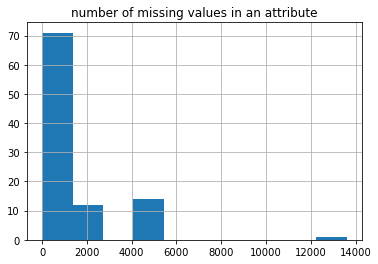

In [8]:
pd.DataFrame({'number of missing values in an attribute': df_training.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

In [9]:
# # histogram of attributes

# columns_size = df_training.columns.size
# cols = 3
# rows = math.ceil(columns_size / cols)

# df_training.hist(figsize=(50,200), layout=(rows, cols))

### Missing values count (for each attribute)

<AxesSubplot:>

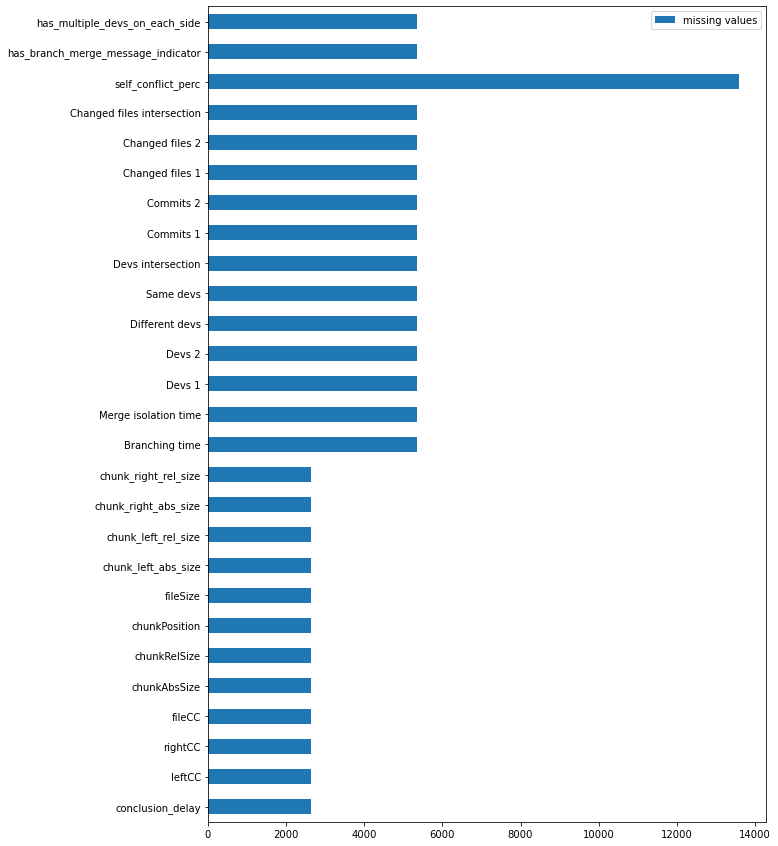

In [10]:
df_count = pd.DataFrame(df_training.count())\
    .apply(lambda x: df_training.shape[0] - x)

df_count.rename(columns={0:'missing values'}, inplace=True )

# df_count\
df_count[df_count['missing values'] != 0]\
.plot.barh(figsize=(10,15))

In [11]:
attrs_NA_percentage = df_count[df_count['missing values'] != 0].shape[0] / df_training.columns.size
attrs_NA_percentage

0.2755102040816326

In [12]:
print(f"{attrs_NA_percentage * 100 : .2f}% of attributes have missing values.")

 27.55% of attributes have missing values.


### Missing values percentage (for each attribute)

<AxesSubplot:>

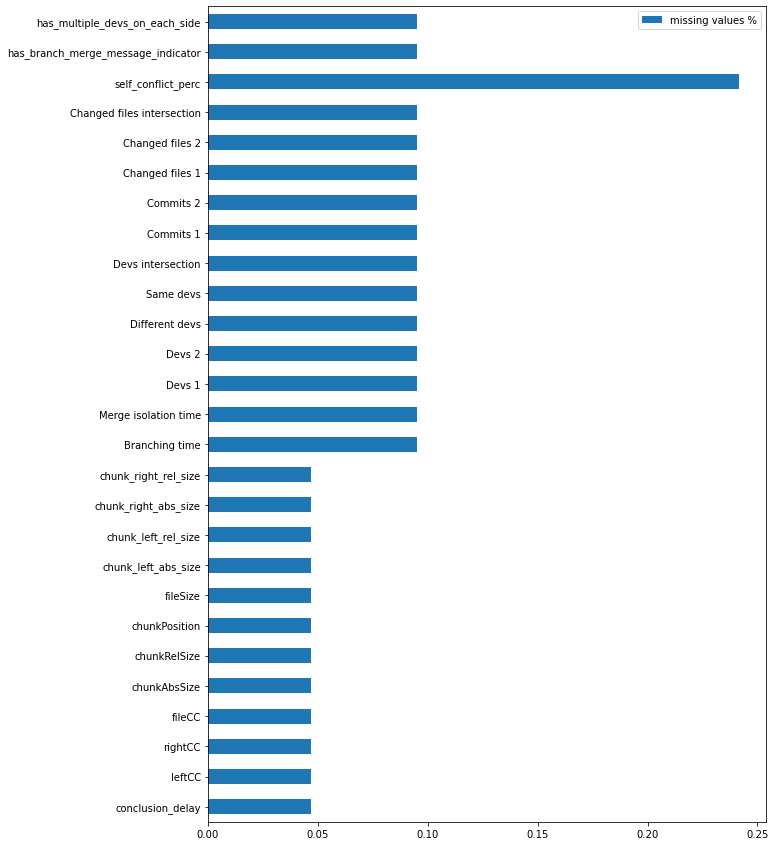

In [13]:
training_rows = df_training.shape[0]

df_count_perc = pd.DataFrame(df_training.count())\
    .apply(lambda x: (training_rows - x) / training_rows)

df_count_perc.rename(columns={0:'missing values %'}, inplace=True )

# df_count\
df_count_perc[df_count_perc['missing values %'] != 0]\
.plot.barh(figsize=(10,15))

In [14]:
df_count_pos = df_count[df_count['missing values'] != 0]
df_count_pos

,missing values
conclusion_delay,2630
leftCC,2625
rightCC,2625
fileCC,2625
chunkAbsSize,2625
chunkRelSize,2625
chunkPosition,2625
fileSize,2625
chunk_left_abs_size,2625
chunk_left_rel_size,2625


In [15]:
columns_NA = df_count_pos.index.values.tolist()
columns_NA

['conclusion_delay',
 'leftCC',
 'rightCC',
 'fileCC',
 'chunkAbsSize',
 'chunkRelSize',
 'chunkPosition',
 'fileSize',
 'chunk_left_abs_size',
 'chunk_left_rel_size',
 'chunk_right_abs_size',
 'chunk_right_rel_size',
 'Branching time',
 'Merge isolation time',
 'Devs 1',
 'Devs 2',
 'Different devs',
 'Same devs',
 'Devs intersection',
 'Commits 1',
 'Commits 2',
 'Changed files 1',
 'Changed files 2',
 'Changed files intersection',
 'self_conflict_perc',
 'has_branch_merge_message_indicator',
 'has_multiple_devs_on_each_side']

In [16]:
df_training[columns_NA].dtypes

conclusion_delay                      float64
leftCC                                float64
rightCC                               float64
fileCC                                float64
chunkAbsSize                          float64
chunkRelSize                          float64
chunkPosition                         float64
fileSize                              float64
chunk_left_abs_size                   float64
chunk_left_rel_size                   float64
chunk_right_abs_size                  float64
chunk_right_rel_size                  float64
Branching time                        float64
Merge isolation time                  float64
Devs 1                                float64
Devs 2                                float64
Different devs                        float64
Same devs                             float64
Devs intersection                     float64
Commits 1                             float64
Commits 2                             float64
Changed files 1                   

### Filling missing values with a constant value

In [17]:
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

# fill missing values with -1
df_constant = pd.DataFrame(imp_constant.fit_transform(df_training),
                           columns = df_training.columns)


Before filling missing values:

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

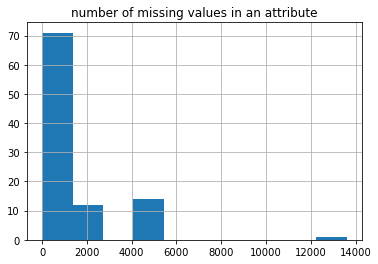

In [18]:
pd.DataFrame({'number of missing values in an attribute': df_training.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

After filling missing values:

array([[<AxesSubplot:title={'center':'number of missing values in an attribute'}>]],
      dtype=object)

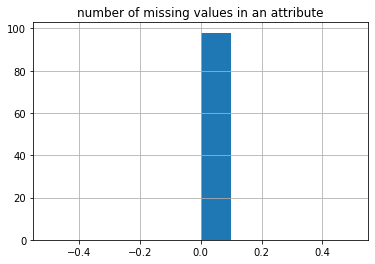

In [19]:
pd.DataFrame({'number of missing values in an attribute': df_constant.count()})\
.apply(lambda x: df_training.shape[0] - x).hist()

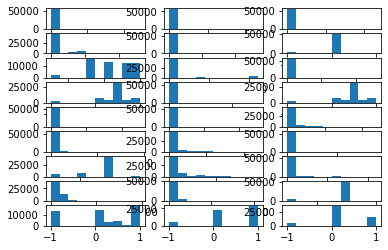

In [20]:
# TODO: configure subplot to show larger histograms with a label

columns_size = len(columns_NA)
cols = 3
rows = math.ceil(columns_size / cols)

for i, column in enumerate(columns_NA):
    plt.subplot(rows, cols, i+1)
    plt.hist(df_constant[column]) 